In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from core.util.io import read_csv, read_xlsx
from itertools import product

We read the file, and convert the timestamps to include the timezone.

In [2]:
trefor_data = read_csv("interim/trefor_cleaned.csv")

trefor_data = trefor_data.set_index(
    pd.to_datetime(
        trefor_data.pop("Dato") + " " + trefor_data.pop("Time"), format="%d-%m-%Y %H:%M"
    ).dt.tz_localize("Europe/Copenhagen", ambiguous="NaT", nonexistent="shift_forward")
)

We create a new dataframe, that has the hour of the day as the index, an the value being the mean value (ignoring NaN).

In [3]:
hourly_means = trefor_data.groupby(trefor_data.index.hour, as_index=True).mean()

# Convert the index to an integer and set name
hourly_means.index = hourly_means.index.astype(int)
hourly_means.index.name = "Hour"

hourly_means

,Bolig 1,Bolig 2,Bolig 3,Bolig 4,Bolig 5,Bolig 6,Bolig 7,Bolig 8,Bolig 9,Bolig 10,...,Bolig 391,Bolig 392,Bolig 393,Bolig 394,Bolig 395,Bolig 396,Bolig 397,Bolig 398,Bolig 399,Bolig 400
Hour,,,,,,,,,,,,,,,,,,,,,
0,1.684274,0.130467,0.089832,1.104315,1.822444,0.986356,0.230384,0.164315,0.601644,0.133996,...,1.035616,0.366589,5.767384,3.085096,1.066028,1.595178,1.930671,0.417340,0.818137,0.438137
1,1.091342,0.128242,0.084213,0.957027,1.600392,1.429932,0.219315,0.125233,0.691808,0.134325,...,1.031329,0.323630,5.383397,3.208110,0.858592,1.359219,2.503329,0.424884,0.676055,0.394726
2,0.664972,0.127421,0.077886,0.849435,1.339437,1.682121,0.215455,0.102672,0.616846,0.135499,...,1.049904,0.285620,3.977796,3.037176,0.625501,0.928196,2.679380,0.320322,0.592218,0.382989
3,0.339740,0.128974,0.081666,0.723415,0.822343,1.590260,0.213224,0.095191,0.501598,0.161621,...,1.050027,0.295464,2.015943,2.291694,0.421593,0.686243,2.181940,0.203130,0.509713,0.328005
4,0.213000,0.130316,0.095903,0.616767,0.535832,1.089699,0.214260,0.093959,0.490479,0.187006,...,1.107726,0.322438,0.953110,1.243219,0.305142,0.458151,1.084603,0.150887,0.507137,0.314137
5,0.280877,0.151276,0.225588,0.564986,0.468098,0.545247,0.218959,0.097123,0.562288,0.219408,...,1.215130,0.342785,0.509424,0.752812,0.374057,0.185281,0.488656,0.192897,0.493786,0.344239
6,0.380384,0.225514,0.313563,0.578685,0.603343,0.338904,0.291548,0.131822,0.685712,0.250385,...,1.251507,0.580836,0.386521,0.626110,0.450967,0.230534,0.514671,0.210902,0.435411,0.456123
7,0.387901,0.234423,0.312923,0.672740,0.804909,0.334411,0.389465,0.192881,0.665315,0.282982,...,1.221260,0.795932,0.406781,0.503580,0.523175,0.302493,0.501726,0.323493,0.456219,0.525734
8,0.456233,0.215734,0.304902,0.653836,1.144294,0.415329,0.400796,0.234164,0.619312,0.282505,...,1.225890,0.434548,0.399685,0.359479,0.514095,0.313173,0.506082,0.357988,0.490548,0.510329


Now, we take the average of all the households

In [4]:
mean_consumption = hourly_means.mean(axis=1)
mean_consumption

Hour
0     0.891015
1     0.908682
2     0.843303
3     0.707397
4     0.535233
5     0.428694
6     0.432362
7     0.452577
8     0.464791
9     0.478487
10    0.490661
11    0.526117
12    0.560643
13    0.573374
14    0.580148
15    0.620224
16    0.720736
17    0.793823
18    0.737582
19    0.675930
20    0.671052
21    0.685599
22    0.729315
23    0.806720
dtype: float64

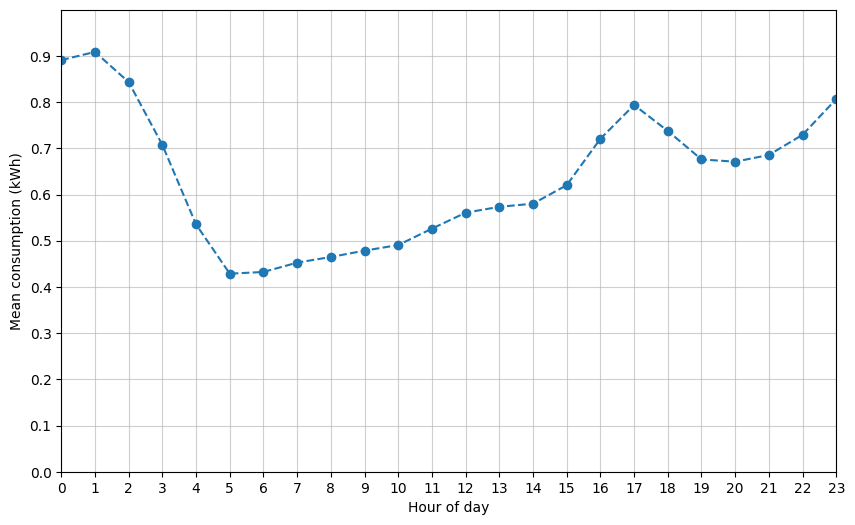

In [5]:
plt.figure(figsize=(10, 6))

plt.ylabel("Mean consumption (kWh)")
plt.xlabel("Hour of day")
plt.xticks(range(24))
plt.yticks(np.arange(0, 1, 0.1))
plt.grid(alpha=0.6)

ax = plt.gca()
ax.set_xlim([0, 23])
ax.set_ylim([0, 1])

plt.plot(mean_consumption, "o--")

plt.show()

## Now, we do the same for the other dataset

In [6]:
trefor_data = read_csv("interim/trefor_park.csv")

trefor_data = trefor_data.set_index(
    pd.to_datetime(
        trefor_data.pop("Dato") + " " + trefor_data.pop("Time"), format="%d-%m-%Y %H:%M"
    ).dt.tz_localize("Europe/Copenhagen", ambiguous="NaT", nonexistent="shift_forward")
)

In [7]:
hourly_means = trefor_data.groupby(trefor_data.index.hour, as_index=True).mean()

# Convert the index to an integer and set name
hourly_means.index = hourly_means.index.astype(int)
hourly_means.index.name = "Hour"

mean_consumption = hourly_means.mean(axis=1)

mean_consumption

Hour
0      31.097328
1      20.090974
2      14.687551
3      14.103965
4      20.739295
5      43.633701
6      79.496778
7     119.502615
8     157.473975
9     202.921746
10    259.205409
11    297.382904
12    307.507400
13    308.865665
14    315.413330
15    320.648398
16    314.154626
17    287.554932
18    244.106898
19    199.504293
20    159.146229
21    114.709491
22     77.338614
23     49.632404
dtype: float64

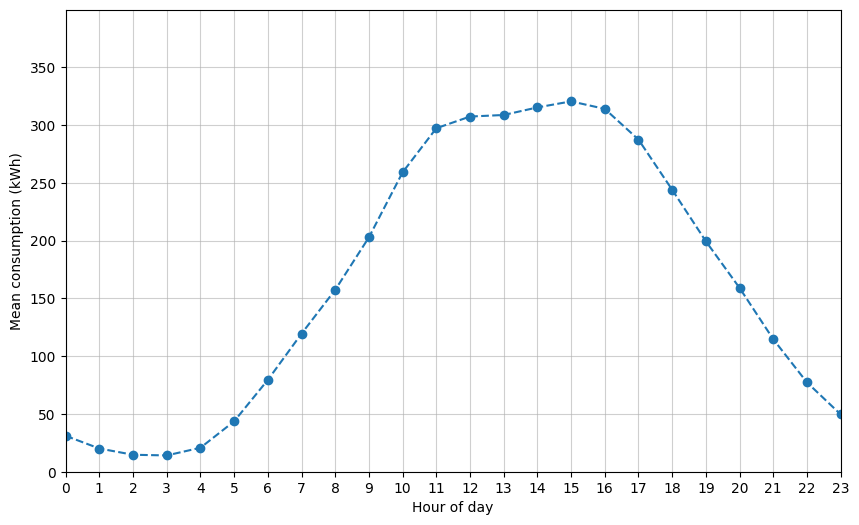

In [8]:
plt.figure(figsize=(10, 6))

plt.ylabel("Mean consumption (kWh)")
plt.xlabel("Hour of day")
plt.xticks(range(24))
plt.yticks(np.arange(0, 400, 50))
plt.grid(alpha=0.6)

ax = plt.gca()
ax.set_xlim([0, 23])
ax.set_ylim([0, 400])

plt.plot(mean_consumption, "o--")

plt.show()

## Plot of the average consumption per hour for each weekday
Functions for calculating the average consumption for each hour of the week

In [9]:
def avg_hourly_consumption(data: pd.DataFrame) -> np.array:
    """Get the average hourly consumption."""
    data["sum"] = data.sum(axis=1, numeric_only=True)  # Add sum column
    hour_sum = np.zeros(168)
    hour_count = 6 * 24 - 1  # The dataset starts on saturday 00:00
    for index, row in data.iterrows():
        hour_sum[hour_count] += row["sum"]
        if hour_count == 167:
            hour_count = 0
        else:
            hour_count += 1
    return get_avg_weekly(hour_sum)


def get_avg_weekly(hour_sum: np.array) -> np.array:
    """Get the average for each hour."""
    divisor = len(data) / 168
    for i in range(len(hour_sum)):
        hour_sum[i] = hour_sum[i] / divisor
    return hour_sum

Values for the x-axis

In [10]:
# List of weekdays and hours
weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
hours = [f"{hour:02}:00" for hour in range(24)]
# Generate all combinations of weekdays and hours
weekdays_hours = [f"{day} {hour}" for day, hour in product(weekdays, hours)]

Plotting the data

<Figure size 1000x600 with 0 Axes>

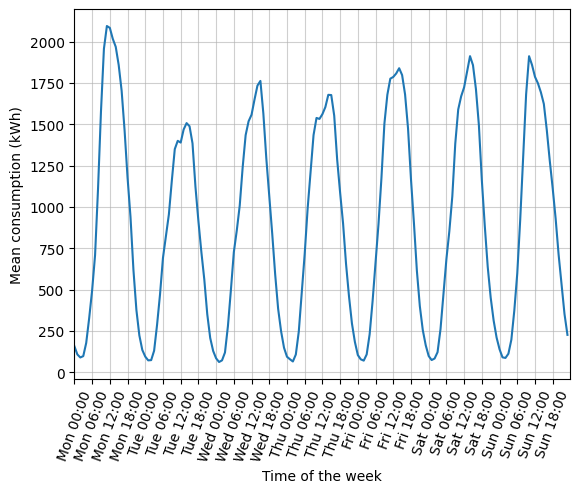

<Figure size 1000x600 with 0 Axes>

In [11]:
data = read_xlsx("raw/trefor_park.xlsx")

plt.plot(weekdays_hours, avg_hourly_consumption(data))
plt.ylabel("Mean consumption (kWh)")
plt.xlabel("Time of the week")
plt.xticks(np.arange(0, 168, 6), rotation=70)
plt.grid(alpha=0.6)
ax = plt.gca()
ax.set_xlim([0, 168])
plt.figure(figsize=(10, 6))